<a href="https://www.kaggle.com/code/eavprog/abscur-reyting-dohod?scriptVersionId=133978315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг абсолютной доходности для проекта "Абсолютные валютные курсы"

[**Оглавление проекта "Абсолютные валютные курсы"**](https://docs.google.com/spreadsheets/d/1UgC2NfKtKJPaXglsmVJET7Xnp2ZtOzJgKD9DN-VGFA8/edit#gid=77497797)

Данные для настоящего расчета берутся из тетрадки [**Источник данных для проекта "Абсолютные валютные курсы"**](https://www.kaggle.com/code/eavprog/abscur-data).

Настоящий расчет показывает относительное изменение (в процентах) абсолютных валютных курсов за разные периоды (неделя, месяц, квартал и т.д.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Markdown, display

import abscur_post as ap
import abscur_menu
abscur_menu.print_menu()

data_abs = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)
# data_abs.last("15d")

cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []

def rep(per,title_per):
    global img_cnt,tabs,period
    res = data_abs.asfreq(freq="D",method="pad").pct_change(per).last("D").transpose()*100
    res.columns = ['%']
    res.sort_values('%',ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг абсолютной доходности за "+title_per+" c "+datetime.datetime.strftime(data_abs.asfreq(freq="D").index[-per],"%Y-%m-%d")+" по "+datetime.datetime.strftime(data_abs.index[-1],"%Y-%m-%d"),ylabel="%",legend=False,figsize=(15,5))
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    plt.show()
    
    def make_clickable(val):
        if val == '...':
            return '...'
        return '<a target="_blank" href="{}">Wikipedia link</a>'.format(val)
    
    text = "**Самые доходные и убыточные валюты за " + title_per + ":**\n\n"
    text += "|код|изменение|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur][0],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    text += "|...|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur][0],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    res = res.merge(cur_ras,left_index=True,right_index=True)
    
    res = pd.concat([res.iloc[:3,:],pd.DataFrame([{'%':'...','Расшифровка':'...','Ссылка на Wikipedia':'...'}],index=['...']),res.iloc[-3:,:]]).style.format({'Ссылка на Wikipedia': make_clickable})
    
    tabs.append(res)
    period.append(title_per)
       
    return 

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц
Относительное изменение (в процентах) абсолютных валютных курсов за месяц.

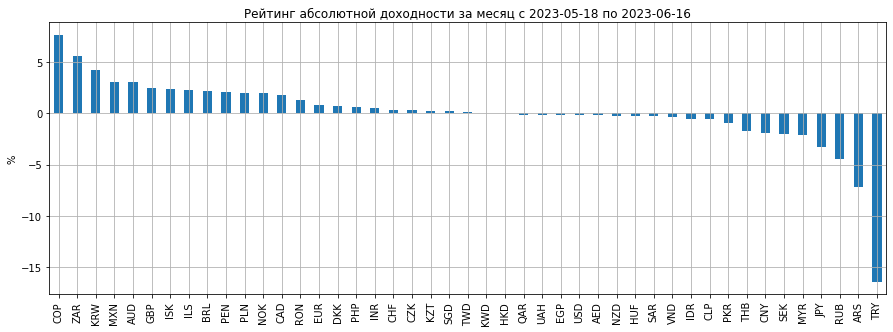

**Самые доходные и убыточные валюты за месяц:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**COP**|7.699%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**ZAR**|5.645%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**KRW**|4.243%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**MXN**|3.042%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**AUD**|3.041%|Австралийский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AUD)|
|...|...|...|...|
|**MYR**|-2.133%|Малайзийский ринггит|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MYR)|
|**JPY**|-3.273%|Японская иена|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#JPY)|
|**RUB**|-4.412%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ARS**|-7.233%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|-16.454%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за месяц**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-месяц)

In [2]:
rep(30,"месяц")

# За квартал
Относительное изменение (в процентах) абсолютных валютных курсов за квартал.

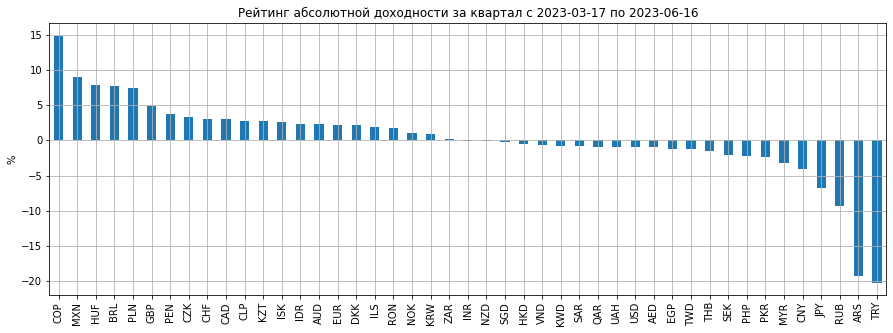

**Самые доходные и убыточные валюты за квартал:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**COP**|14.917%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**MXN**|9.054%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**HUF**|7.856%|Венгерский форинт|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HUF)|
|**BRL**|7.808%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|**PLN**|7.532%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|...|...|...|...|
|**CNY**|-4.034%|Китайский юань|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CNY)|
|**JPY**|-6.746%|Японская иена|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#JPY)|
|**RUB**|-9.259%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ARS**|-19.303%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|-20.237%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за квартал**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-квартал)

In [3]:
rep(92,"квартал")

# За полгода
Относительное изменение (в процентах) абсолютных валютных курсов за полгода.

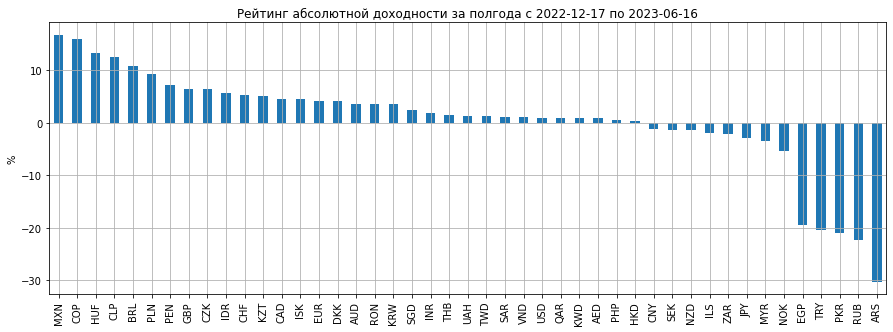

**Самые доходные и убыточные валюты за полгода:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|16.748%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**COP**|15.854%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**HUF**|13.161%|Венгерский форинт|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HUF)|
|**CLP**|12.477%|Чилийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CLP)|
|**BRL**|10.788%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|...|...|...|...|
|**EGP**|-19.423%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**TRY**|-20.377%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**PKR**|-21.103%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|-22.405%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ARS**|-30.285%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за полгода**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-полгода)

In [4]:
rep(182,"полгода")

# За год
Относительное изменение (в процентах) абсолютных валютных курсов за год.

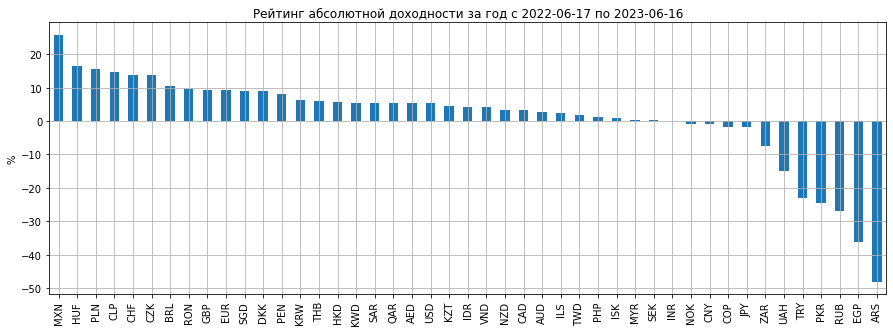

**Самые доходные и убыточные валюты за год:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|25.849%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**HUF**|16.482%|Венгерский форинт|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HUF)|
|**PLN**|15.538%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|**CLP**|14.69%|Чилийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CLP)|
|**CHF**|13.859%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|...|...|...|...|
|**TRY**|-23.0%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**PKR**|-24.437%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|-27.044%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|-36.234%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|-48.099%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за год**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-год)

In [5]:
rep(365,"год")

# За 2 года
Относительное изменение (в процентах) абсолютных валютных курсов за два года.

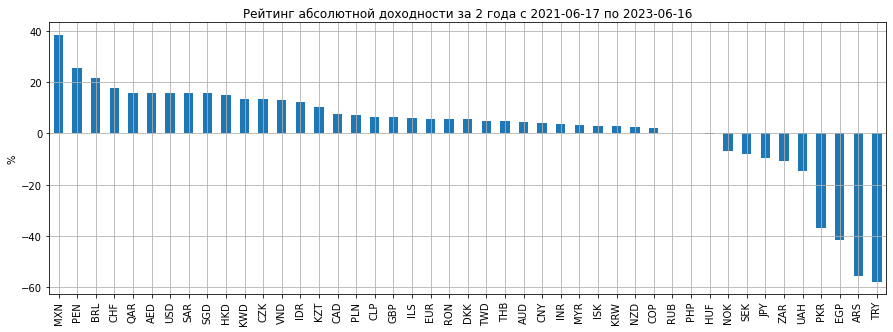

**Самые доходные и убыточные валюты за 2 года:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|38.474%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**PEN**|25.451%|Перуанский новый соль|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%83%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9_%D1%81%D0%BE%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PEN)|
|**BRL**|21.65%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|**CHF**|17.723%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**QAR**|15.825%|Катарский риал|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#QAR)|
|...|...|...|...|
|**UAH**|-14.746%|Украинская гривна|[wiki](https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D1%80%D0%B8%D0%B2%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#UAH)|
|**PKR**|-36.781%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**EGP**|-41.439%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|-55.72%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|-57.812%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 2 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-2-года)

In [6]:
rep(365*2,"2 года")

# За 3 года
Относительное изменение (в процентах) абсолютных валютных курсов за три года.

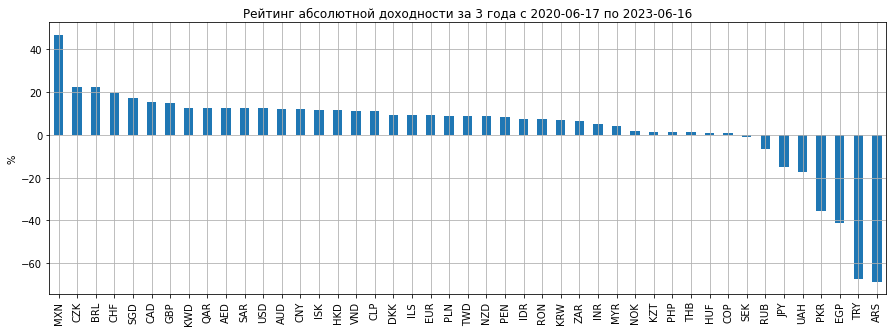

**Самые доходные и убыточные валюты за 3 года:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|46.772%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**CZK**|22.386%|Чешская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CZK)|
|**BRL**|22.326%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|**CHF**|19.669%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**SGD**|17.218%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|...|...|...|...|
|**UAH**|-17.538%|Украинская гривна|[wiki](https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D1%80%D0%B8%D0%B2%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#UAH)|
|**PKR**|-35.521%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**EGP**|-41.214%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**TRY**|-67.463%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-68.6%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 3 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-3-года)

In [7]:
rep(365*3,"3 года")

# За 5 лет
Относительное изменение (в процентах) абсолютных валютных курсов за пять лет.

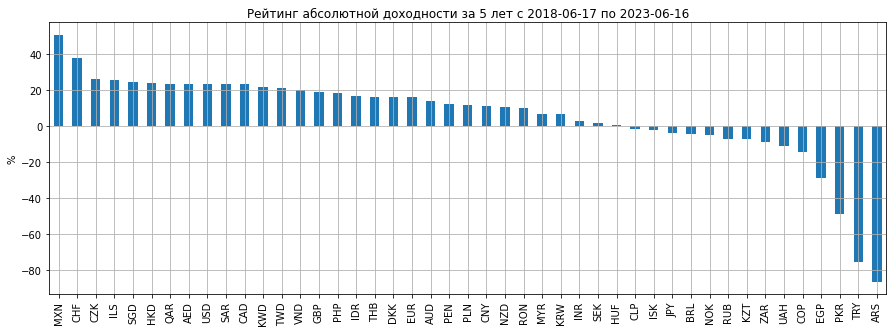

**Самые доходные и убыточные валюты за 5 лет:**

|код|изменение|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|50.902%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**CHF**|37.787%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**CZK**|26.066%|Чешская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CZK)|
|**ILS**|25.807%|Новый израильский шекель|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B8%D0%B7%D1%80%D0%B0%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%88%D0%B5%D0%BA%D0%B5%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ILS)|
|**SGD**|24.751%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|...|...|...|...|
|**COP**|-14.186%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**EGP**|-28.723%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|-48.757%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|-75.281%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-86.273%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-5-лет)

In [8]:
rep(365*5+1,"5 лет")

In [9]:
import numpy as np

num = np.random.randint(img_cnt)
text = f"За {period[num]} более всего выросли абсолютные курсы таких валют как {tabs[num].data.iloc[0,1]}, {tabs[num].data.iloc[1,1]} и {tabs[num].data.iloc[2,1]}. Более всех потеряли абсолютной стоимости такие валюты как {tabs[num].data.iloc[-1,1]}, {tabs[num].data.iloc[-2,1]} и {tabs[num].data.iloc[-3,1]}."
text += "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-reyting-dohod"
img_file = str(num) + ".png"
ap.send_img_and_text(img_file,text)
